In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import datasets


In [17]:
#verificar las versiones
import sys
import sklearn
import matplotlib as plt1
print('Python version:', sys.version)
print('scikit-learn version:', sklearn.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)


Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
scikit-learn version: 1.6.1
pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [18]:
#Carga y exploración de datos
iris = datasets.load_iris()

#Convertir a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

#mapeo de etiquetas numéricas
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
#mostrar las primeras filas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Valores nulos del dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


<ipython-input-19-d0c9925e7e98>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette= 'viridis')


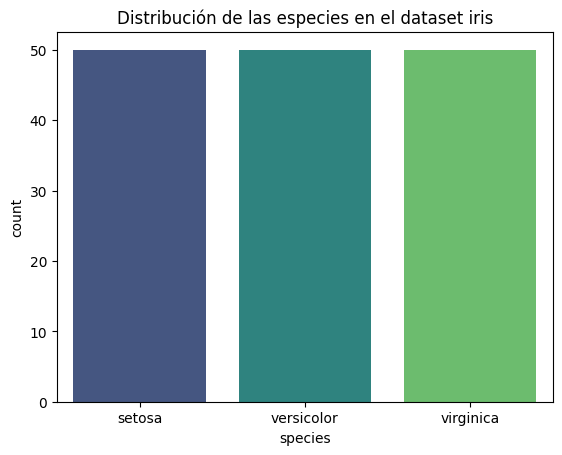

In [19]:
#Información general de dataset
df.info()

#Resumen estadístico
df.describe()

#Comprobaciones de los valores
print('Valores nulos del dataset:\n', df.isnull().sum())

#Visualización de la distribución de clases
sns.countplot(x='species', data=df, palette= 'viridis')
plt.title('Distribución de las especies en el dataset iris')
plt.show()


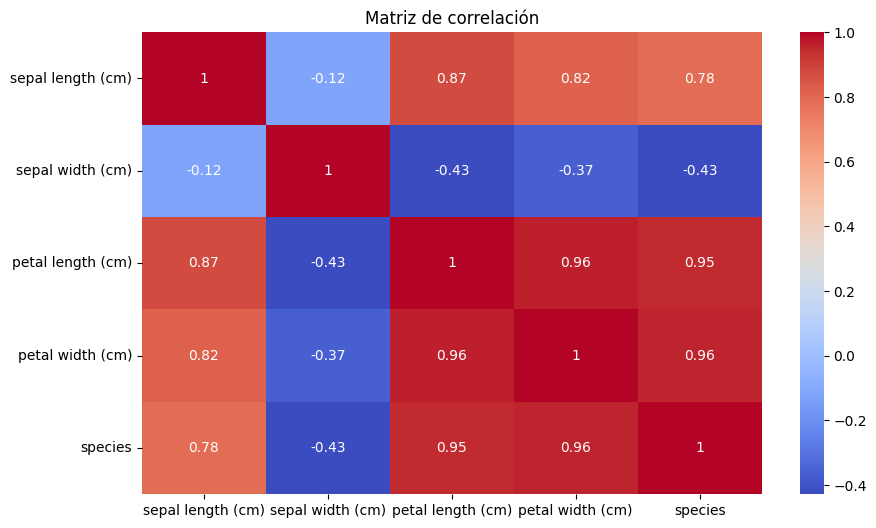

In [20]:
#Convertir a valores numericos 'species'
df_encoded = df.copy()
df_encoded['species'] = df_encoded['species'].astype('category').cat.codes

#Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [21]:
#Separación de las características (X) y la variable objetivo(y)
X= df.drop(columns=['species'])
y= df['species']

#División en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
#Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Precisión del Random Forest: 1.0000



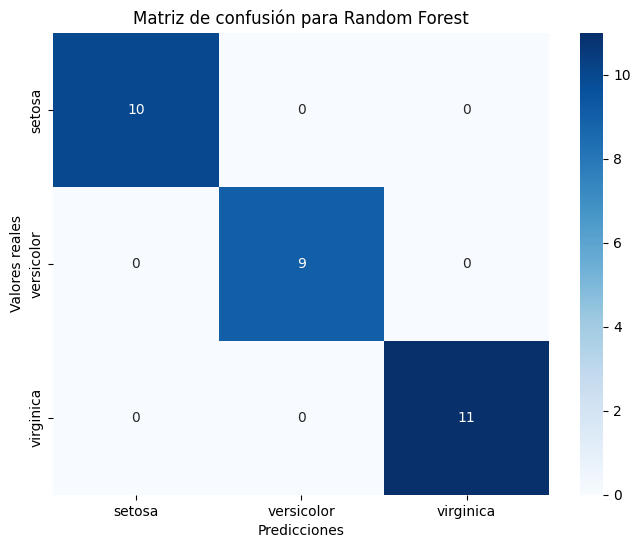

Informe de clasificación para Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Precisión del Decision Tree: 1.0000



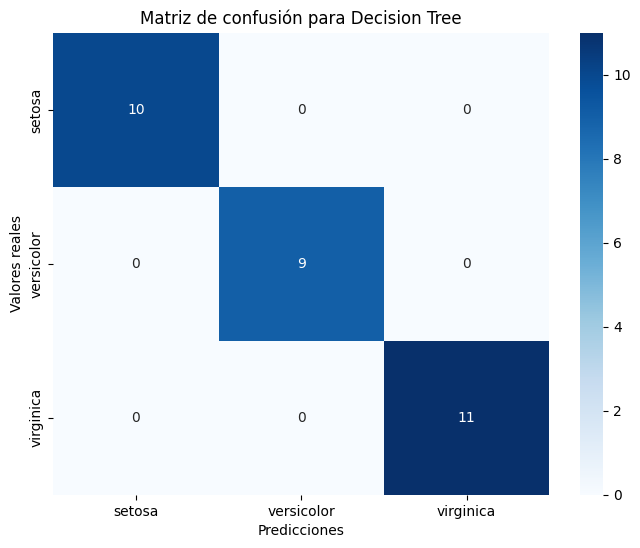

Informe de clasificación para Decision Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Precisión del KNN: 1.0000



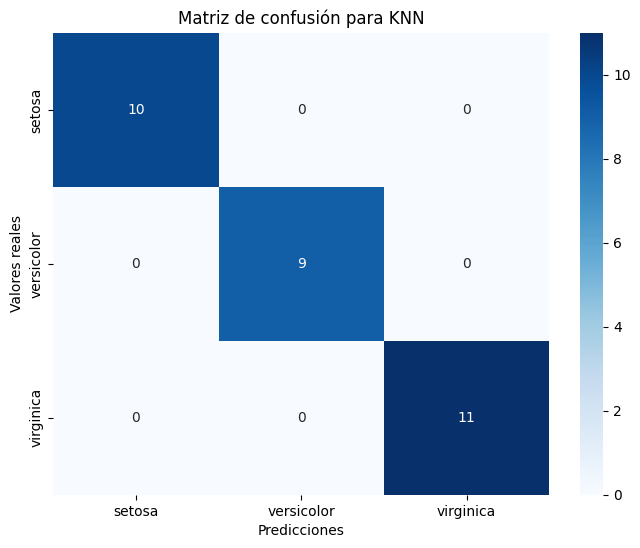

Informe de clasificación para KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Precisión del SVM: 1.0000



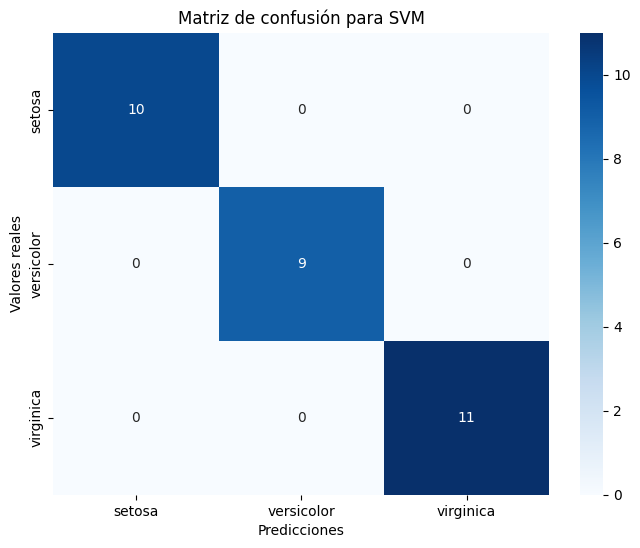

Informe de clasificación para SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




In [23]:
#Definimos una función para entrenar y ealuar cada modelo
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Evaluacion
    acc = accuracy_score(y_test, y_pred)
    print(f'Precisión del {model_name}: {acc:.4f}\n')

    #Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title(f'Matriz de confusión para {model_name}')
    plt.show()

    #Informe de clasificación
    class_rep = classification_report(y_test, y_pred)
    print(f'Informe de clasificación para {model_name}:\n{class_rep}\n')

    #Devolver valores (en este ej no es necesario)
    return acc, conf_matrix, class_rep

#Modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators= 100, random_state= 42),
    'Decision Tree': DecisionTreeClassifier(random_state= 42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state= 42)
}

#Entrenamiento y clasificación
for model_name, model in models.items():
    train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name)

In [24]:
#Comparación de la precisión
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc



<ipython-input-25-ff91ca71b7df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')


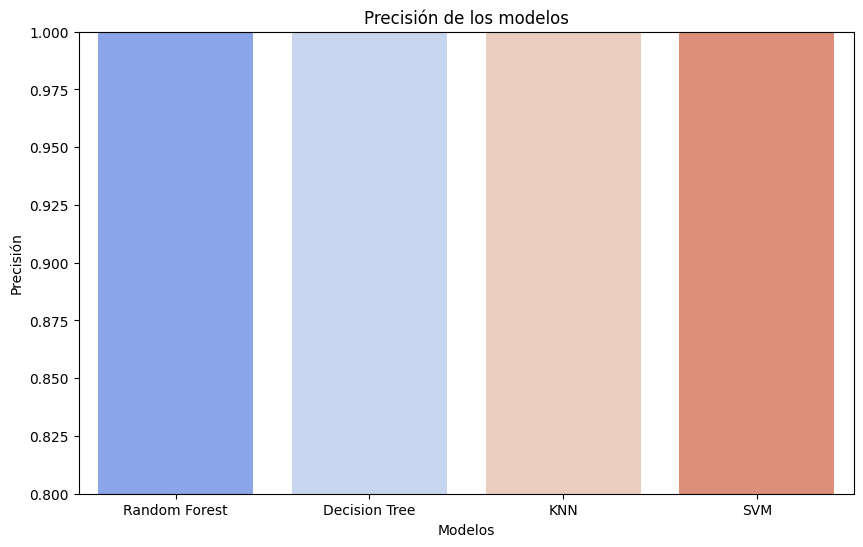

In [25]:
#Visualización de la práctica
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')
plt.ylim(0.8,1)
plt.title('Precisión de los modelos')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.show()
